In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("hf://datasets/buio/heart-disease/heart.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
df.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   
5   56    1   2       120   236    0        0      178      0      0.8      1   
6   62    0   4       140   268    0        2      160      0      3.6      3   
7   57    0   4       120   354    0        0      163      1      0.6      1   
8   63    1   4       130   254    0        2      147      0      1.4      2   
9   53    1   4       140   203    1        2      155      1      3.1      3   

   ca        thal  target  
0   0       fixed       0  
1   3      normal       1  
2   2  reversible       0  
3   0      normal       0  
4   0      normal       0  
5   0      normal       0  
6   2      normal       1  
7   0      normal       0  
8   1  reversible       1  
9   0  reversible       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [5]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.594059    0.676568    3.108911  131.785479  246.547855    0.148515   
std      9.016370    0.468560    1.028414   17.748338   52.175933    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.194719    0.326733    1.057756    1.590759    0.683168   
std      0.988293   23.173368    0.469794    1.165025    0.617767    0.937773   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  132.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  165.500000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

           target  
count  303.000000  
mean     0.273927  
std      0.446710  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [12]:
target_counts = df['target'].value_counts()
print(target_counts)

target
0    220
1     83
Name: count, dtype: int64


In [10]:
df = df.drop(columns=['index'], errors='ignore')

In [14]:
high_cholesterol_patients = df[df['chol'] > 280]
print(high_cholesterol_patients)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1     67    1   4       160   286    0        2      108      1      1.5   
7     57    0   4       120   354    0        0      163      1      0.6   
11    56    0   2       140   294    0        2      153      0      1.3   
21    58    0   1       150   283    1        2      162      0      1.0   
22    58    1   2       120   284    0        2      160      0      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
288   57    0   4       128   303    0        2      159      0      0.0   
291   54    1   2       108   309    0        0      156      0      0.0   
296   61    0   4       145   307    0        2      146      1      1.0   
299   43    0   4       132   341    1        2      136      1      3.0   
302   63    0   4       150   407    0        2      154      0      4.0   

     slope  ca        thal  target  
1        2   3      normal       1  
7        1   

In [15]:
average_age = df.groupby('target')['age'].mean()
print(average_age)


target
0    53.495455
1    57.506024
Name: age, dtype: float64


In [16]:
data_array = df.to_numpy()

In [17]:
data_array

array([[63, 1, 1, ..., 0, 'fixed', 0],
       [67, 1, 4, ..., 3, 'normal', 1],
       [67, 1, 4, ..., 2, 'reversible', 0],
       ...,
       [65, 1, 4, ..., 1, 'reversible', 1],
       [48, 1, 4, ..., 2, 'reversible', 1],
       [63, 0, 4, ..., 3, 'reversible', 1]], dtype=object)

In [18]:
mean_age = np.mean(data_array[:, 0])  # Assuming age is the first column
std_age = np.std(data_array[:, 0])

print(f'Mean Age: {mean_age}, Standard Deviation: {std_age}')

Mean Age: 54.59405940594059, Standard Deviation: 9.001479399299258


In [19]:
chol_threshold = 280
high_chol_count = np.sum(data_array[:, 4] > chol_threshold)  # Assuming cholesterol is the fifth column

print(f'Number of patients with cholesterol > {chol_threshold}: {high_chol_count}')

Number of patients with cholesterol > 280: 71


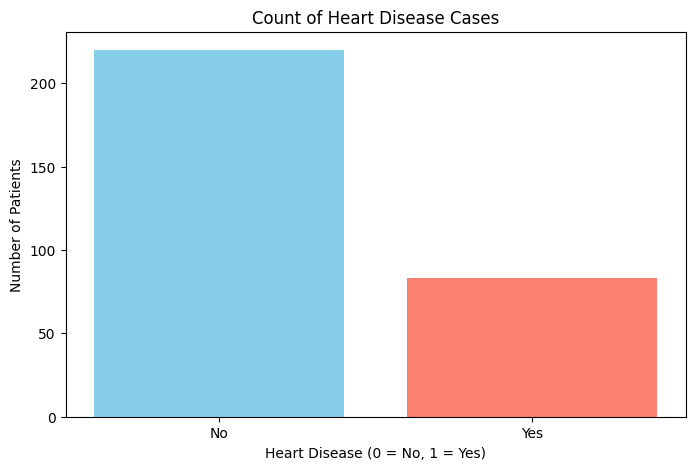

In [20]:
plt.figure(figsize=(8, 5))
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'salmon'])
plt.title('Count of Heart Disease Cases')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

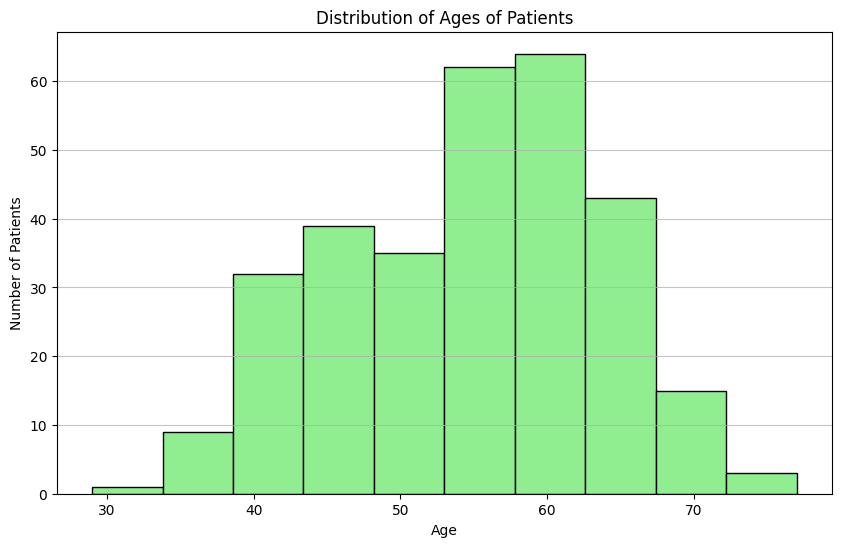

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Ages of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(axis='y', alpha=0.75)
plt.show()

<ipython-input-22-b69dbfca6179>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a futur

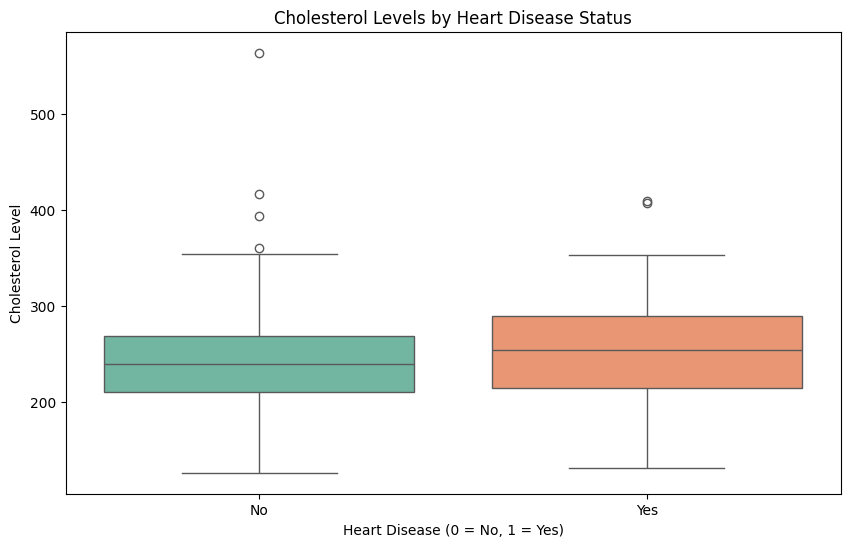

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df, palette='Set2')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

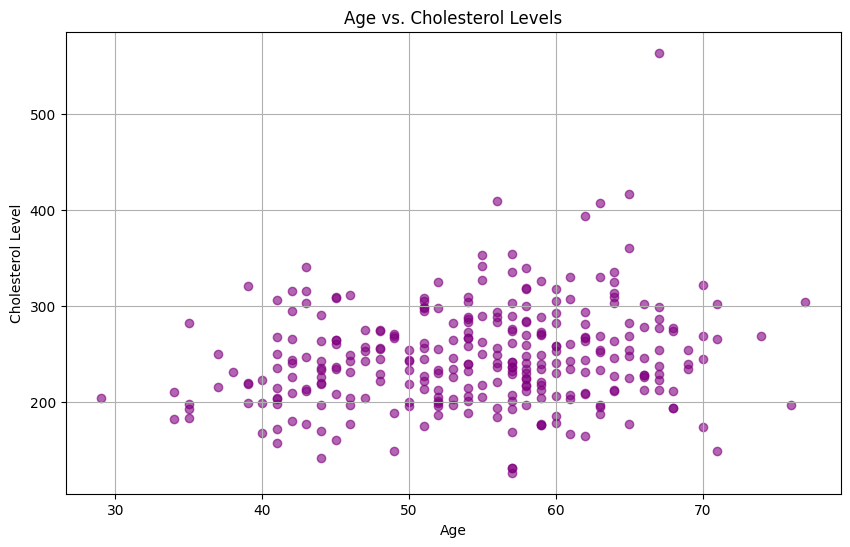

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['chol'], alpha=0.6, color='purple')
plt.title('Age vs. Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.grid()
plt.show()